In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [147]:
train_all = pd.read_csv('train.csv')
test_all = pd.read_csv('test.csv')
len(test_all)

20775

In [148]:
train_data, valid_data = train_test_split(train_all, test_size=0.2, random_state=42)

# どの特徴が故障に影響しやすいのかを分析する

<Figure size 432x288 with 0 Axes>

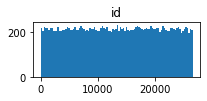

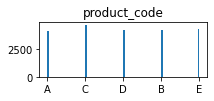

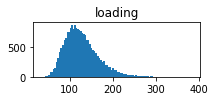

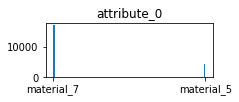

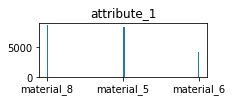

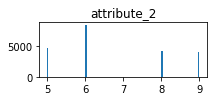

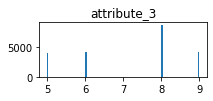

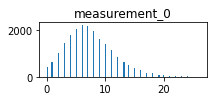

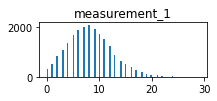

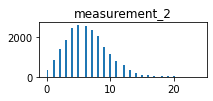

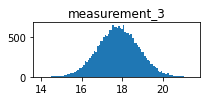

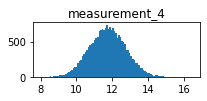

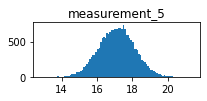

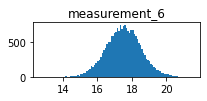

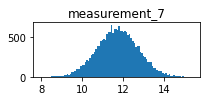

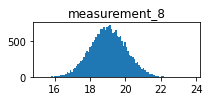

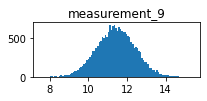

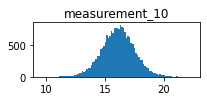

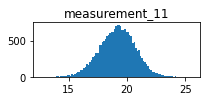

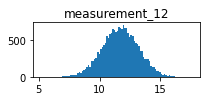

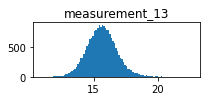

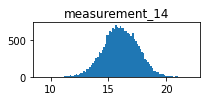

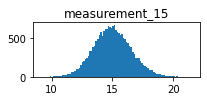

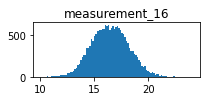

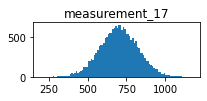

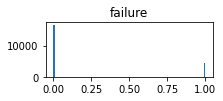

In [140]:
# 各特徴慮のヒストグラムを確認
datasets = [train_data, valid_data]

plt.figure(figsize=(6, 4))
for col in train_data.columns:
    plt.figure(figsize=(3, 1))
    plt.title(col)
    plt.hist(train_data[col], bins=100)
    plt.show()
    plt.close()

In [149]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data["Total"]>0]

,Total,Percent
measurement_17,1837,0.086423
measurement_16,1699,0.079930
measurement_15,1623,0.076355
measurement_14,1496,0.070380
measurement_13,1401,0.065911
measurement_12,1315,0.061865
measurement_11,1153,0.054244
measurement_10,1042,0.049021
measurement_9,972,0.045728
measurement_8,852,0.040083


In [151]:

for col in train_data.columns:
  if train_data[col].isnull().sum() > 500:
    train_data.drop(col, axis=1, inplace=True)
  elif train_data[col].dtype == 'object':
    train_data[col].fillna(train_data[col].mode(), inplace=True)
  elif dataset[col].dtype == 'str':
    train_data[col].fillna(train_data[col].mode(), inplace=True)
  else:
    train_data[col].fillna(train_data[col].mean(), inplace=True)



In [93]:
# for dataset in datasets:
#   dataset.dropna(inplace=True)
#   # for col in dataset.columns:
#   #   if dataset[col].isnull().sum()>0:
#   #     dataset.drop(col, axis=1, inplace=True)
#       # dataset[col].fillna(dataset[col].mean(), inplace=True)
# #missing data
# total = train_data.isnull().sum().sort_values(ascending=False)
# percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.loc[missing_data["Total"]>0]

,Total,Percent


In [152]:
# カテゴリ変数を数値変数に変換
train_data = pd.get_dummies(train_data)
train_data.info()
# test_all = pd.get_dummies(test_all)

# full_dataset = pd.concat([train_X, test_all])
# full_dataset = pd.get_dummies(full_dataset)
# train_X = full_dataset.iloc[train_X.index]
# test_all = full_dataset.iloc[test_all.index]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21256 entries, 4031 to 23654
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21256 non-null  int64  
 1   loading                 21256 non-null  float64
 2   attribute_2             21256 non-null  int64  
 3   attribute_3             21256 non-null  int64  
 4   measurement_0           21256 non-null  int64  
 5   measurement_1           21256 non-null  int64  
 6   measurement_2           21256 non-null  int64  
 7   measurement_3           21256 non-null  float64
 8   measurement_4           21256 non-null  float64
 9   failure                 21256 non-null  int64  
 10  product_code_A          21256 non-null  uint8  
 11  product_code_B          21256 non-null  uint8  
 12  product_code_C          21256 non-null  uint8  
 13  product_code_D          21256 non-null  uint8  
 14  product_code_E          21256 non-n

In [153]:
valid_data = pd.get_dummies(valid_data)
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 24141 to 21844
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5314 non-null   int64  
 1   loading                 5271 non-null   float64
 2   attribute_2             5314 non-null   int64  
 3   attribute_3             5314 non-null   int64  
 4   measurement_0           5314 non-null   int64  
 5   measurement_1           5314 non-null   int64  
 6   measurement_2           5314 non-null   int64  
 7   measurement_3           5226 non-null   float64
 8   measurement_4           5215 non-null   float64
 9   measurement_5           5177 non-null   float64
 10  measurement_6           5145 non-null   float64
 11  measurement_7           5115 non-null   float64
 12  measurement_8           5118 non-null   float64
 13  measurement_9           5059 non-null   float64
 14  measurement_10          5056 non-nu

In [154]:
for col in train_data.columns:
  if not col in valid_data.columns:
    print(col + 'という列は存在しません')
    valid_data[col] = 0
valid_data = valid_data[train_data.columns]
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 24141 to 21844
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5314 non-null   int64  
 1   loading                 5271 non-null   float64
 2   attribute_2             5314 non-null   int64  
 3   attribute_3             5314 non-null   int64  
 4   measurement_0           5314 non-null   int64  
 5   measurement_1           5314 non-null   int64  
 6   measurement_2           5314 non-null   int64  
 7   measurement_3           5226 non-null   float64
 8   measurement_4           5215 non-null   float64
 9   failure                 5314 non-null   int64  
 10  product_code_A          5314 non-null   uint8  
 11  product_code_B          5314 non-null   uint8  
 12  product_code_C          5314 non-null   uint8  
 13  product_code_D          5314 non-null   uint8  
 14  product_code_E          5314 non-nu

In [155]:
for col in train_data.columns:
  if not col in test_all.columns:
    print(col + 'という列は存在しません')
    test_all[col] = 0
test_all = test_all[train_data.columns]
test_all.info()

failureという列は存在しません
product_code_Aという列は存在しません
product_code_Bという列は存在しません
product_code_Cという列は存在しません
product_code_Dという列は存在しません
product_code_Eという列は存在しません
attribute_0_material_5という列は存在しません
attribute_0_material_7という列は存在しません
attribute_1_material_5という列は存在しません
attribute_1_material_6という列は存在しません
attribute_1_material_8という列は存在しません
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20775 non-null  int64  
 1   loading                 20552 non-null  float64
 2   attribute_2             20775 non-null  int64  
 3   attribute_3             20775 non-null  int64  
 4   measurement_0           20775 non-null  int64  
 5   measurement_1           20775 non-null  int64  
 6   measurement_2           20775 non-null  int64  
 7   measurement_3           20446 non-null  float64
 8   measurement_4           20366 non-nul

In [156]:
train_data = train_data.drop(["id"], axis=1)
valid_data = valid_data.drop(["id"], axis=1)
test_all = test_all.drop(["id", "failure"], axis=1)

In [157]:
train_X, train_y = train_data.drop(['failure'], axis=1), train_data['failure']
valid_X, valid_y = valid_data.drop(['failure'], axis=1), valid_data['failure']
len(train_y)

21256

In [158]:
len(train_X)

21256

In [159]:
len(test_all)

20775

In [162]:

for col in valid_X.columns:
  if valid_X[col].dtype == 'object':
    valid_X[col].fillna(train_data[col].mode(), inplace=True)
  elif valid_X[col].dtype == 'str':
    valid_X[col].fillna(train_data[col].mode(), inplace=True)
  else:
    valid_X[col].fillna(train_data[col].mean(), inplace=True)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)

lr_svg = LinearSVC()
lr_svg.fit(train_X, train_y)

svg = SVC()
svg.fit(train_X, train_y)

rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

knc = KNeighborsClassifier()
knc.fit(train_X, train_y)

sdg = SGDClassifier()
sdg.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SGDClassifier()

In [172]:
predictions = lr_model.predict(valid_X)

score = lr_model.score(valid_X, valid_y)
score

0.8009032743695897

In [173]:
predictions = lr_svg.predict(valid_X)

score = lr_svg.score(valid_X, valid_y)
score

0.801091456529921

In [174]:
predictions = svg.predict(valid_X)

score = svg.score(valid_X, valid_y)
score

0.801091456529921

In [175]:
predictions = knc.predict(valid_X)

score = knc.score(valid_X, valid_y)
score

0.7578095596537449

In [184]:
predictions = rfc.predict(valid_X)

score = rfc.score(valid_X, valid_y)
score

0.7939405344373354

In [177]:
predictions = sdg.predict(valid_X)

score = sdg.score(valid_X, valid_y)
score

0.801091456529921

In [166]:
for col in test_all.columns:
  if test_all[col].dtype == 'category':
    test_all[col] = train_X[col].mode()
  else:
    test_all[col] = train_X[col].mean()

In [185]:
y_pred = sdg.predict(test_all)


In [186]:
prediction = pd.DataFrame(y_pred, columns=['failure'])

prediction["id"] = pd.read_csv('./test.csv')["id"]

prediction.to_csv("./submit.csv", index=False, header=True)

In [187]:
len(prediction)

20775